In [94]:
#my imports
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from scipy.stats import probplot
import warnings



warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
#get the dataset
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db, table_name))

df = pd.read_sql_query('SELECT * FROM lifeexpectancy', con = engine)

engine.dispose()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#columns look funky
df.columns = df.columns.str.strip()

df.isna().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

# Before filling values, I wanna check and see min and max in comparison to see if there are bad outliers for means

In [6]:
for column in  df.columns[3:]:
    var = df[column]
    small = var.min()
    big = var.max()
    deviate = var.std()
    
    print(column)
    print(f'Min is:  {small}')
    print(f'Max is:  {big}')
    print(f'STD is:  {deviate}')
   


Life expectancy
Min is:  36.3
Max is:  89.0
STD is:  9.523867487824278
Adult Mortality
Min is:  1.0
Max is:  723.0
STD is:  124.29207900342202
infant deaths
Min is:  0
Max is:  1800
STD is:  117.9265013133981
Alcohol
Min is:  0.01
Max is:  17.87
STD is:  4.052412658755652
percentage expenditure
Min is:  0.0
Max is:  19479.91161
STD is:  1987.9148580161984
Hepatitis B
Min is:  1.0
Max is:  99.0
STD is:  25.070015593018123
Measles
Min is:  0
Max is:  212183
STD is:  11467.272489234567
BMI
Min is:  1.0
Max is:  87.3
STD is:  20.04403350256207
under-five deaths
Min is:  0
Max is:  2500
STD is:  160.44554840573417
Polio
Min is:  3.0
Max is:  99.0
STD is:  23.42804594946845
Total expenditure
Min is:  0.37
Max is:  17.6
STD is:  2.4983196721556302
Diphtheria
Min is:  2.0
Max is:  99.0
STD is:  23.716912068572515
HIV/AIDS
Min is:  0.1
Max is:  50.6
STD is:  5.077784531086524
GDP
Min is:  1.68135
Max is:  119172.7418
STD is:  14270.16934151599
Population
Min is:  34.0
Max is:  1293859294.0
STD 

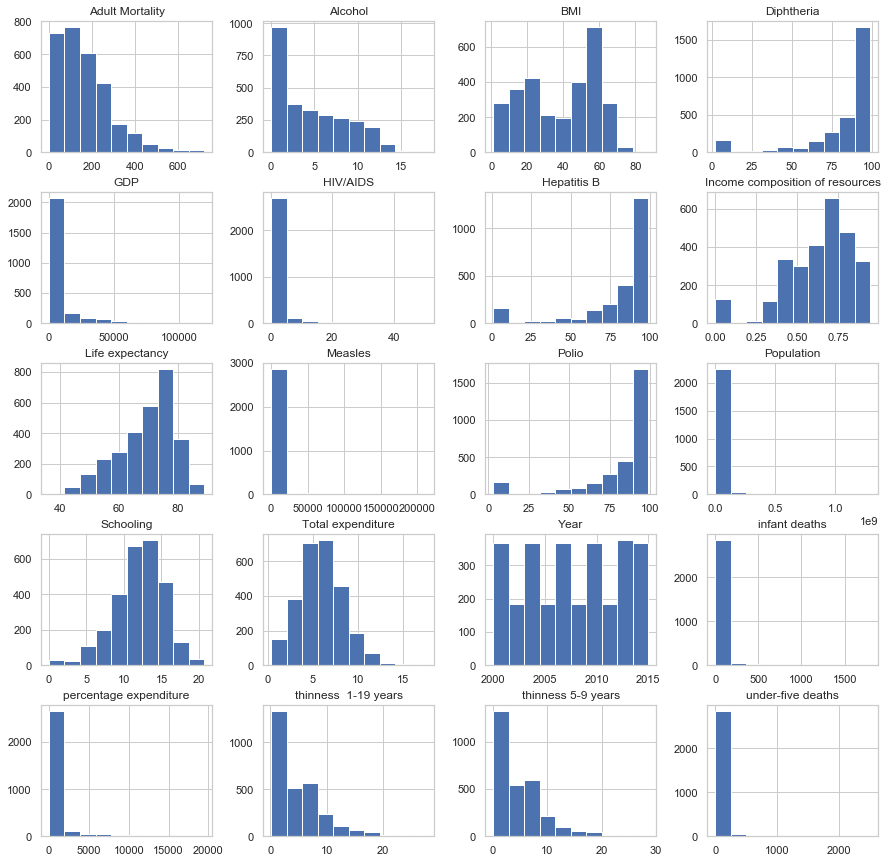

In [7]:
#look at histograms to see general curve and attempt to detect mass outliers
df.hist(figsize = (15,15))
plt.show()

# I don't see too many outliers so I'm gonna fill by mean

In [8]:
fill_df = df.copy()
need_to_fill = ['Life expectancy','Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
               'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
               'Schooling']

for col in need_to_fill:
    fill_df.loc[:,col] = fill_df.loc[:,col].fillna(fill_df.loc[:,col].mean())

In [9]:
#make sure this worked
fill_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Now on to interpolate and comparisons among the two to see which one is better

In [10]:
inter_df = df.copy()
for col in need_to_fill:
    inter_df.loc[:,col] = inter_df.loc[:, col].interpolate()


In [11]:
#let's do the mean by year because I can't figure out how to sort by country. I'm not smart

pop_df = df.copy()
years = pop_df["Year"].unique()

for col in need_to_fill:
    for year in years:
        pop_df.loc[pop_df["Year"] == year, col] = pop_df.loc[pop_df["Year"] == year, col].fillna(
            pop_df[pop_df["Year"] == year][col].mean())

In [12]:
pop_df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
for col in need_to_fill:
    print('Stats for: {}'.format(col))
    print(pd.concat([df[col], fill_df[col], inter_df[col], pop_df[col]], axis = 1).describe())

Stats for: Life expectancy
       Life expectancy  Life expectancy  Life expectancy  Life expectancy
count      2928.000000      2938.000000      2938.000000      2938.000000
mean         69.224932        69.224932        69.214874        69.231777
std           9.523867         9.507640         9.510819         9.508362
min          36.300000        36.300000        36.300000        36.300000
25%          63.100000        63.200000        63.100000        63.200000
50%          72.100000        72.000000        72.000000        72.000000
75%          75.700000        75.600000        75.600000        75.600000
max          89.000000        89.000000        89.000000        89.000000
Stats for: Adult Mortality
       Adult Mortality  Adult Mortality  Adult Mortality  Adult Mortality
count      2928.000000      2938.000000      2938.000000      2938.000000
mean        164.796448       164.796448       164.744554       164.741882
std         124.292079       124.080302       124.226596  

# Looks like doing general mean is better than specialized mean and interpolation. If I could figure out how to fill based on country, I'd want to try that for next pass through.

In [14]:

def find_z_score(sample):
    for column in  sample.columns:
        var = stats.zscore(sample[column])
        small = var.min()
        big = var.max()
        print(column)
        print(f'Min is:  {small}')
        print(f'Max is:  {big}')
    
find_z_score(fill_df.select_dtypes(include=['float64', 'int64']))

Year
Min is:  -1.6298784908947028
Max is:  1.6217623010351567
Life expectancy
Min is:  -3.463586777506765
Max is:  2.0802674929010387
Adult Mortality
Min is:  -1.3203089339714467
Max is:  4.499494007167724
infant deaths
Min is:  -0.2570169256653636
Max is:  15.009325999864597
Alcohol
Min is:  -1.1729584018986523
Max is:  3.388259111251576
percentage expenditure
Min is:  -0.37143289259454365
Max is:  9.429403166006338
Hepatitis B
Min is:  -3.539849644426931
Max is:  0.7996958107436184
Measles
Min is:  -0.21103572121748299
Max is:  18.295467854833035
BMI
Min is:  -1.8731536327605787
Max is:  2.4582439871615565
under-five deaths
Min is:  -0.2620383964766972
Max is:  15.322224258249507
Polio
Min is:  -3.4071275910584027
Max is:  0.70454398678701
Total expenditure
Min is:  -2.3202091677166066
Max is:  4.859360377924712
Diphtheria
Min is:  -3.3983717740773227
Max is:  0.7055289161190191
HIV/AIDS
Min is:  -0.3234448000817086
Max is:  9.62353033585425
GDP
Min is:  -0.5696022191662836
Max is:  

# Is population really that weird?

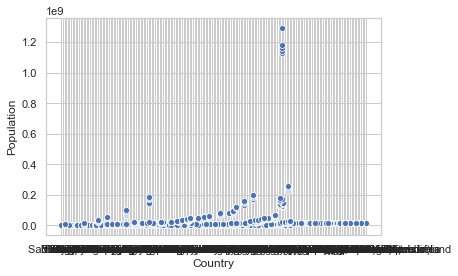

In [15]:
population = fill_df[['Population', 'Country']].sort_values(by = 'Population')
population
sns.scatterplot(x = 'Country', y = 'Population', data = population)


In [16]:
population = fill_df.sort_values(by = ['Population'], ascending = False)
population

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1188,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.000000,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1195,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.000000,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1196,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.000000,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1197,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.000000,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1198,India,2004,Developing,64.0,214.0,1600,1.20,27.338009,6.000000,55443,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,Hungary,2010,Developed,74.5,156.0,0,10.78,19.220240,80.940461,0,...,99.0,7.85,99.0,0.1,1325.533790,1.230000e+02,1.8,1.8,0.817,15.3
986,Georgia,2008,Developing,73.9,128.0,1,7.17,151.762567,89.000000,56,...,9.0,8.99,92.0,0.1,3174.949100,4.300000e+01,2.6,2.8,0.735,13.1
1604,Maldives,2014,Developing,78.2,62.0,0,0.01,2051.748615,99.000000,0,...,99.0,13.73,99.0,0.1,7716.241500,4.100000e+01,13.6,13.7,0.693,12.7
1609,Maldives,2009,Developing,76.3,75.0,0,1.59,100.503021,98.000000,6,...,98.0,9.22,98.0,0.1,597.165900,3.600000e+01,14.1,14.2,0.651,11.8


# I can't take off India's population. It is a population anomoly, but needs to stay since without India, the population curve is much more normal. 

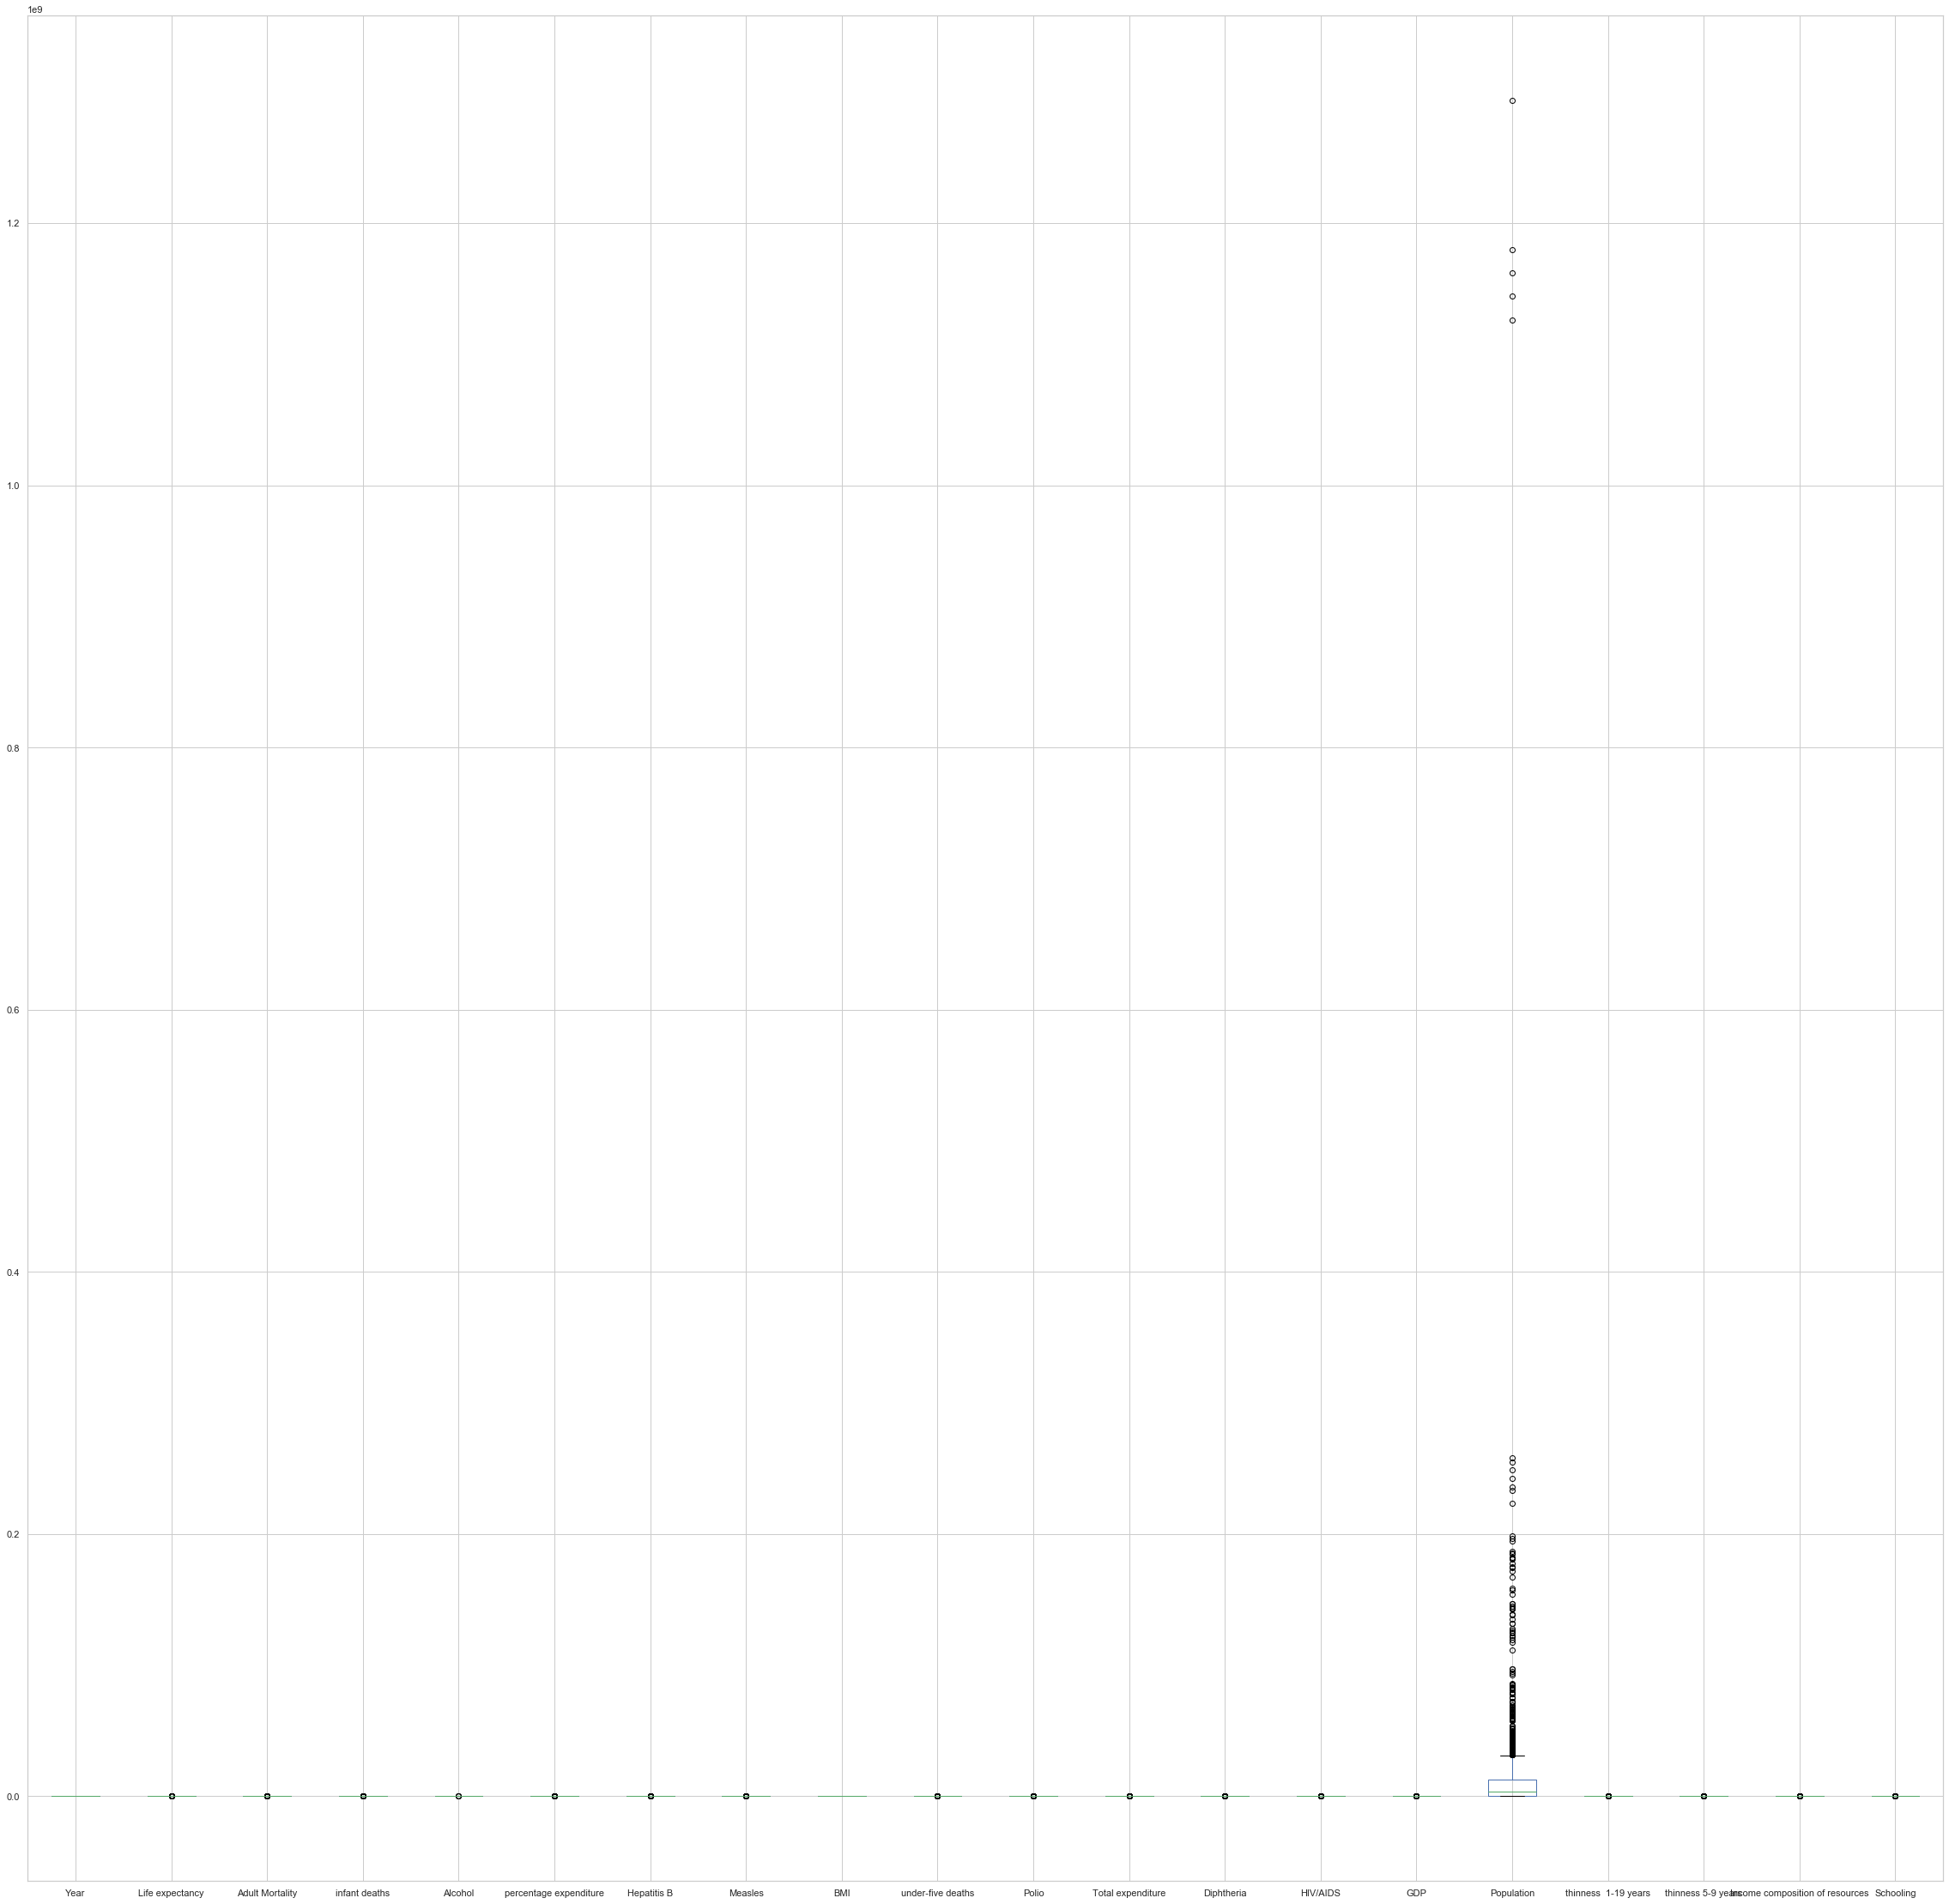

In [17]:
fill_df.boxplot(figsize = (40, 40))
plt.show()

# clearly is India well and above

# Based on the z_values, I'm gonna keep limits of 4 on each side. I'll compare log and box_cox

There were 31 observations removed by z-score.


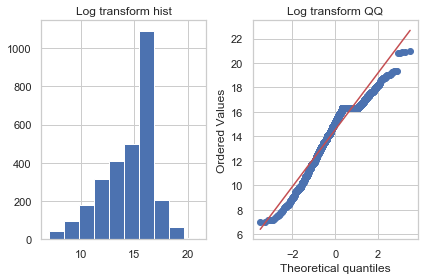

In [18]:
log_pop = np.log(fill_df['Population'])
z_scores = stats.zscore(log_pop)
outlier_filter = np.where(abs(z_scores) <= 3)
filtered_log_pop = log_pop.values[outlier_filter]

# Show count of lost observations
print(f'There were {len(log_pop) - len(filtered_log_pop)} observations removed by z-score.')

# Re-check histogram and normal QQ plot
fig, axes = plt.subplots(1, 2)

axes[0].hist(filtered_log_pop)
stats.probplot(filtered_log_pop, dist='norm', plot=axes[1])

axes[0].set_title('Log transform hist')
axes[1].set_title('Log transform QQ')

fig.tight_layout()
plt.show()

There were 5 observations removed by z-score.


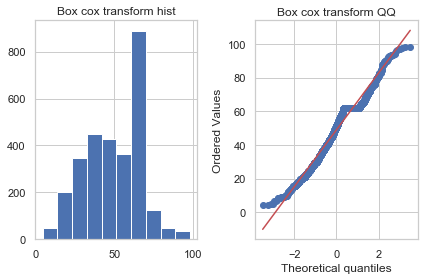

In [92]:
boxcox_pop,_ = stats.boxcox(fill_df['Population'])
z_scores_pop = stats.zscore(boxcox_pop)
outlier_filter_pop = np.where(abs(z_scores_pop) <= 3)
filtered_boxcox_pop = boxcox_pop[outlier_filter_pop]
#fill_df.values
#boxcox_pop

#Show count of lost observations
print(f'There were {len(boxcox_pop) - len(filtered_boxcox_pop)} observations removed by z-score.')

# Re-check histogram and normal QQ plot
fig, axes = plt.subplots(1, 2)

axes[0].hist(filtered_boxcox_pop)
stats.probplot(filtered_boxcox_pop, dist='norm', plot=axes[1])

axes[0].set_title('Box cox transform hist')
axes[1].set_title('Box cox transform QQ')

fig.tight_layout()
plt.show()

# Boxcox looks better, but let's be sure

In [88]:
log_df = fill_df.copy()
log_df = np.log(log_df.select_dtypes(include=['float64', 'int64']))
log_df.apply(find_z_score(log_df.select_dtypes(include=['float64', 'int64'])))
outlier_filter = np.where(abs(z_scores) <= 3)
filtered_log_pop = log_pop.values[outlier_filter]

Year
Min is:  -1.6317713607116666
Max is:  1.6198790388953268
Life expectancy
Min is:  -4.3277940674356845
Max is:  1.781882792444751
Adult Mortality
Min is:  -4.392257155295902
Max is:  1.7480228621122573
infant deaths
Min is:  nan
Max is:  nan
Alcohol
Min is:  -2.449478420537962
Max is:  1.1020430754429336
percentage expenditure
Min is:  nan
Max is:  nan
Hepatitis B
Min is:  -7.104579101779164
Max is:  0.5053817967665858
Measles
Min is:  nan
Max is:  nan
BMI
Min is:  -4.234673624012685
Max is:  1.3050809035902553
under-five deaths
Min is:  nan
Max is:  nan
Polio
Min is:  -5.202328228599058
Max is:  0.46916619932330117
Total expenditure
Min is:  -5.73449098592628
Max is:  2.5263311146293415
Diphtheria
Min is:  -5.802805680738507
Max is:  0.47355350865937224
HIV/AIDS
Min is:  -0.6699116001163444
Max is:  3.1900655671445435
GDP
Min is:  -3.9701029605634948
Max is:  2.214985956553206
Population
Min is:  -4.26239210967069
Max is:  2.554210015642238
thinness  1-19 years
Min is:  -3.3098195

TypeError: ("'NoneType' object is not callable", 'occurred at index Year')

In [93]:
def boxed_df(sample):
    box_df = {}
    for col in sample.select_dtypes(include= 'number'):
        smol_value = sample[col].min()
        fixed_value = abs(smol_value) + 1
        box_pop,_ = stats.boxcox(sample[col] + fixed_value)
        box_df[col] = box_pop
    box_df = pd.DataFrame(box_df)
    return box_df


box_df 





#fill_df.loc[30, 'Population']

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,5.226729e+14,2.482823e+07,21.505389,2.631244,0.019856,4.428511,45617.503426,4.839565,15.974688,2.870100,371.410557,4.260872,99996.068940,0.152808,8.647810,71.674122,2.487298,2.569475,0.914935,25.005168
1,5.221189e+14,2.025838e+07,21.798480,2.642828,0.019856,4.461230,40133.358142,4.440540,15.612002,2.883731,97998.862755,4.267576,87384.255346,0.152808,8.732643,34.451366,2.499091,2.577840,0.905766,24.653912
2,5.215653e+14,2.025838e+07,21.689174,2.653978,0.019856,4.456849,43739.235890,4.373918,15.248384,2.896804,118625.826023,4.250804,95666.171789,0.152808,8.787497,71.011391,2.506836,2.586108,0.887587,24.304323
3,5.210121e+14,1.992880e+07,21.834758,2.669952,0.019856,4.526195,49527.731740,5.213627,14.883809,2.913435,148277.819255,4.380515,109043.072334,0.152808,8.893171,50.964934,2.514491,2.598333,0.866644,23.956406
4,5.204594e+14,1.968426e+07,21.943124,2.680137,0.019856,2.126425,51560.901366,5.244933,14.591441,2.929230,154751.371820,4.162891,113763.910075,0.152808,5.108034,49.259082,2.525806,2.606367,0.840136,22.922771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,5.166032e+14,1.010180e+07,33.701278,2.298394,2.129370,0.000000,51560.901366,2.861049,21.667795,2.589520,148277.819255,3.905890,99996.068940,0.500160,8.205348,61.801307,2.071435,2.124305,0.709147,21.904466
2934,5.160541e+14,1.020065e+07,33.537629,2.281904,2.039392,0.000000,166.178708,4.774275,21.387490,2.578915,497.069985,3.685764,113763.910075,0.500226,8.201458,61.693958,2.100229,2.162062,0.738706,22.922771
2935,5.155054e+14,1.035027e+07,11.848166,2.264640,2.149836,0.000000,62531.321805,4.197722,21.106771,2.568000,189985.955094,3.689438,128738.149700,0.500277,4.964817,29.293319,0.795829,0.842634,0.763384,24.653912
2936,5.149572e+14,1.060328e+07,32.935181,2.264640,1.154366,0.000000,69778.679510,4.475991,20.825633,2.556757,213519.292970,3.551968,150667.435200,0.500309,8.535947,61.490992,0.940826,0.984405,0.763384,23.956406


# Let's check some histograms and coorelation heatmaps

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002498AB18DC8>,
      dtype=object)

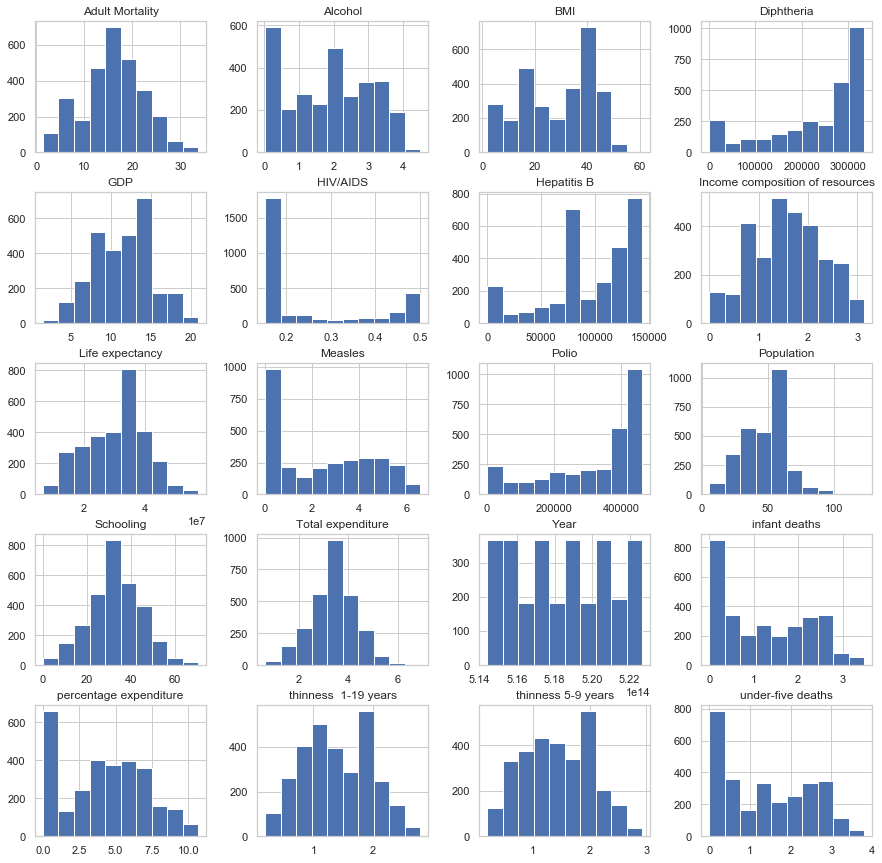

In [84]:
box_df.select_dtypes(include=['float64', 'int64']).hist(figsize = (15,15))


ValueError: supplied range of [-inf, -0.053400776727115296] is not finite

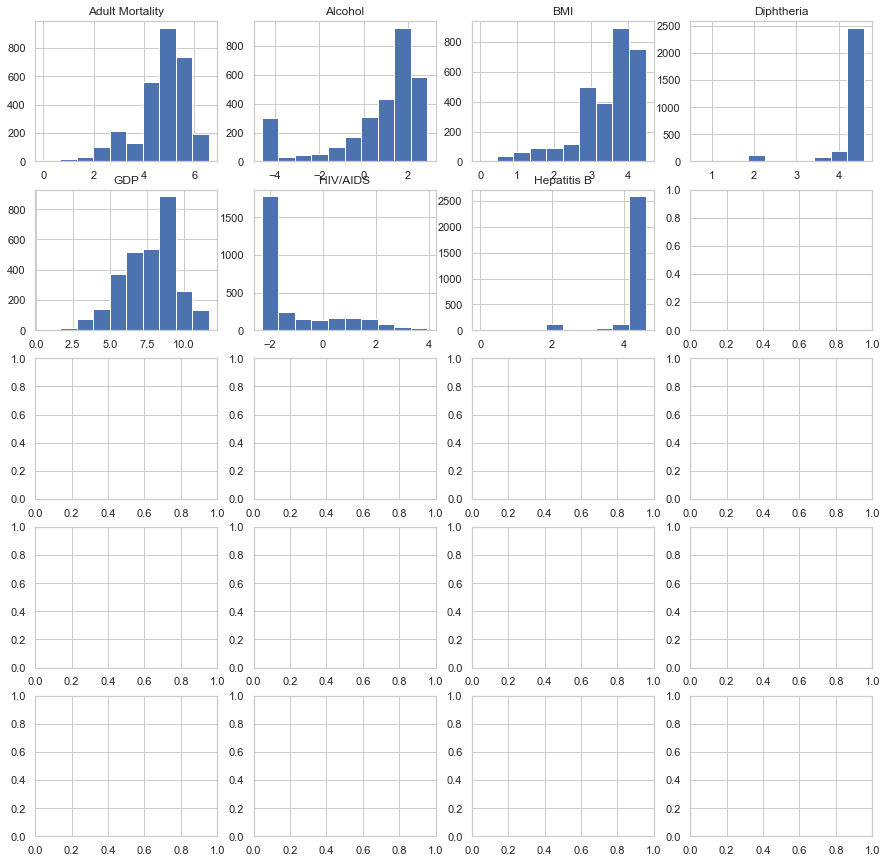

In [87]:
log_df.hist(figsize = (15,15))

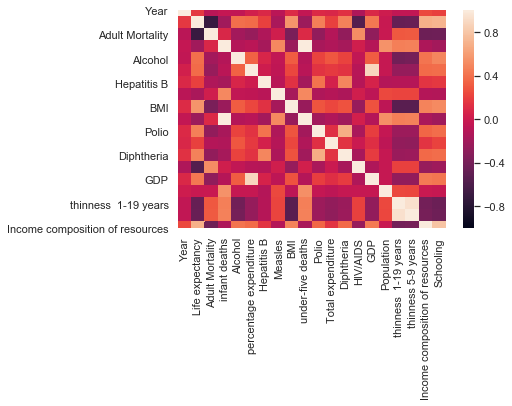

In [74]:
sns.heatmap(fill_df.corr(), vmin = -1, vmax = 1)


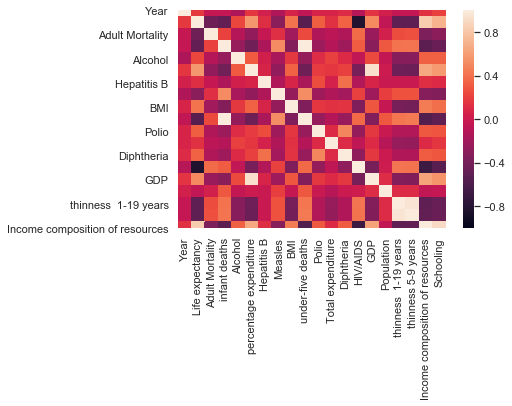

In [77]:
sns.heatmap(log_df.corr(), vmin = -1, vmax = 1)


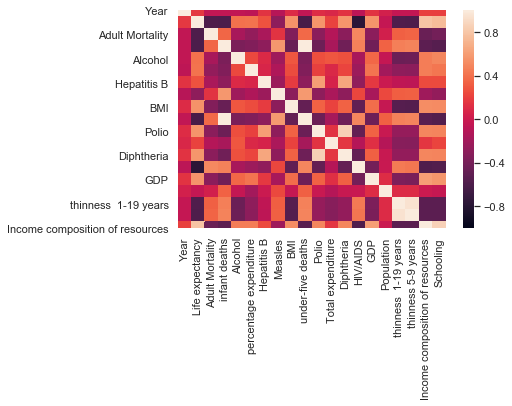

In [78]:
sns.heatmap(box_df.corr(), vmin = -1, vmax = 1)

In [89]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
Year                               2938 non-null float64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null float64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null float64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null float64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2938 non-null float64
Population                         293

In [90]:
box_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
Year                               2938 non-null float64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null float64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null float64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null float64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2938 non-null float64
Population                         293

# I think boxcox dealt with outliers pretty well. I'm gonna keep pressing on with that one.

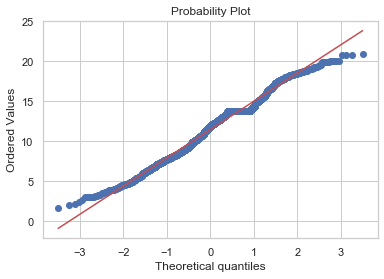

In [96]:
probplot(box_df['GDP'], dist = 'norm', plot = plt)
plt.show()

In [97]:
stats.ttest_ind(box_df['Life expectancy'], box_df['GDP'])

Ttest_indResult(statistic=168.4465453193396, pvalue=0.0)

# Here I re-refer to the heatmap

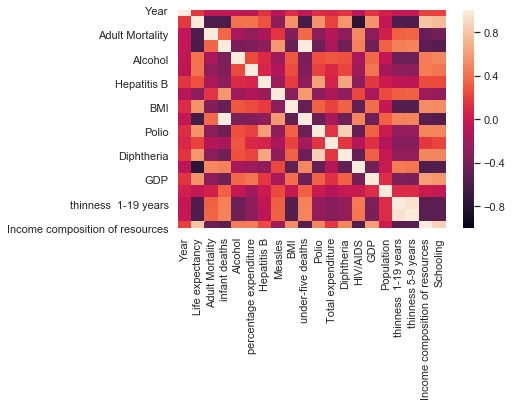

In [98]:
sns.heatmap(box_df.corr(), vmin = -1, vmax = 1)

In [101]:
# I realized I'm trash with colors. 
#I'd want python to show me data with high coorelations then use the heatmap to double check is it positive or negative

corred = box_df.corr().abs()
s = corred.unstack()
s = s.reset_index()

s = s[s['level_0']=='Life expectancy'].sort_values(by = 0, ascending = False)#
s.head(10)

,level_0,level_1,0
21,Life expectancy,Life expectancy,1.000000
38,Life expectancy,Income composition of resources,0.795267
33,Life expectancy,HIV/AIDS,0.771176
39,Life expectancy,Schooling,0.752436
29,Life expectancy,under-five deaths,0.619299
23,Life expectancy,infant deaths,0.599427
37,Life expectancy,thinness 5-9 years,0.590258
22,Life expectancy,Adult Mortality,0.588242
36,Life expectancy,thinness 1-19 years,0.582311
32,Life expectancy,Diphtheria,0.565275


# So I would pick everything above except for life expectancy(redundant), and I wouldn't pick thinness 5-9 years due to redundancy with 1-19 years

In [102]:
s.tail(10)

,level_0,level_1,0
30,Life expectancy,Polio,0.559059
34,Life expectancy,GDP,0.556063
28,Life expectancy,BMI,0.546964
25,Life expectancy,percentage expenditure,0.407059
24,Life expectancy,Alcohol,0.403029
27,Life expectancy,Measles,0.283402
26,Life expectancy,Hepatitis B,0.275213
31,Life expectancy,Total expenditure,0.218431
20,Life expectancy,Year,0.164748
35,Life expectancy,Population,0.032969


# I would 100% drop these bottom values up to Alcohol. I believe 40% coorelation is something to consider and would possibly create a desease feature lumping in polio, measles, etc. Although this would probably create too much noise, but would be interesting to check.